
## Twitter Airline


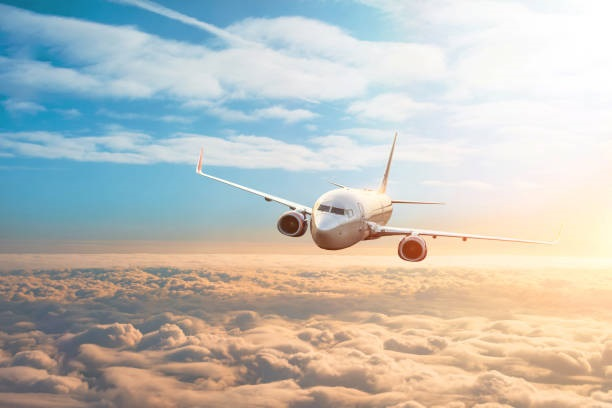

In [1]:
from IPython.display import Image
Image(filename='Airplane.jpg')

#### The purpose of this analysis is to explore the numerous features and build a classification model where we will be able to tag the rating based on the description and consequently rate them as positive or negative. In this analysis, we will be focusing on score, summary, description and score based sentiment features.



##**Steps:**
- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers, 
stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- CountVectorizer
- TfidfVectorizer
- Build Machine Learning Model for Text Classification.
- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary


- Background and Context:

* Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.'

* That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.'

* Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.'

** Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone

In [2]:
# installed these two packages, just for notation purposes 
#!pip install contractions
#!pip install spacy
#!pip install vaderSentiment # install vader sentiment package
#!pip install textblob       # install textblob package

In [3]:
import sys
from termcolor import colored, cprint                   # I would like to add some color
import os                                               # Operating system 
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

In [4]:
import numpy as np
import pandas as pd
print(np.__version__)
print(pd.__version__)

1.23.5
1.5.3


In [5]:
import numpy as np                                      # Import numpy for large and multi-dimensional arrays
import pandas as pd                                     # Import pandas for data manipulation and analysis
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.stem import PorterStemmer                     # Stemmer
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score  

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

dir = os.getcwd()
print(f" The directory used: {dir}")

[nltk_data] Downloading package stopwords to C:\Users\Frederick
[nltk_data]     Duff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Frederick
[nltk_data]     Duff\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Frederick
[nltk_data]     Duff\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 The directory used: C:\Users\Frederick Duff\Desktop\UTAI\NLP\2nd week


In [6]:
# IF i was going to use Google Colab- reference only
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# copy of the dataset
data=pd.read_csv('Tweets.csv')
df = data

In [8]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 14640 rows and 15 columns.


In [9]:
# let's view a random sample of the data
data.sample(n=5, random_state=1)                                   

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8515,568198336651649027,positive,1.0000,NaN,NaN,Delta,NaN,GenuineJack,NaN,0,@JetBlue I'll pass along the advice. You guys ...,NaN,2015-02-18 16:00:14 -0800,Massachusetts,Central Time (US & Canada)
3439,568438094652956673,negative,0.7036,Lost Luggage,0.7036,United,NaN,vina_love,NaN,0,@united I sent you a dm with my file reference...,NaN,2015-02-19 07:52:57 -0800,ny,Quito
6439,567858373527470080,positive,1.0000,NaN,NaN,Southwest,NaN,Capt_Smirk,NaN,0,@SouthwestAir Black History Commercial is real...,NaN,2015-02-17 17:29:21 -0800,La Florida,Eastern Time (US & Canada)
5112,569336871853170688,negative,1.0000,Late Flight,1.0000,Southwest,NaN,scoobydoo9749,NaN,0,@SouthwestAir why am I still in Baltimore?! @d...,"[39.1848041, -76.6787131]",2015-02-21 19:24:22 -0800,"Tallahassee, FL",America/Chicago
5645,568839199773732864,positive,0.6832,NaN,NaN,Southwest,NaN,laurafall,NaN,0,@SouthwestAir SEA to DEN. South Sound Volleyba...,NaN,2015-02-20 10:26:48 -0800,NaN,Pacific Time (US & Canada)


In [10]:
# view the first 5 rows of data
data.head()                                                            

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
# looking now at the last 5 entries 
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [12]:
# look at the data type and columns of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<span style="color:blue">* 15 variables present in the data
- 2 integers
- 12 objects
- 1 uploaded as object but should be as a date ( tweet_created)</span>

In [13]:
# tweet_created should be a date time oriented data type not a object- so we will correct this. 
data['tweet_created']= pd.to_datetime(data['tweet_created'])
data['tweet_created']=data['tweet_created'].astype('datetime64[ns]')

In [14]:
# number of unique values 
df2=data.nunique()
print (df2)

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64


<span style="color:blue"> - we can see that tweet_id,text and tweet_created all have very high unique values</span>

<span style="color:blue"> - Obviously the names are unique - 7701</span>

<span style="color:blue"> - tweet_location has 3081 different locations - so they come from a variety of locales</span>

<span style="color:blue"> - negative_confidence, negativereason_confidence seem related and have similar unique values</span>

In [15]:
# looking at which columns have the most missing values in order from most to least
data.isnull().sum().sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
dtype: int64

#### Checking for duplicated values and properly eliminating them from the data if present.

In [16]:
data.duplicated().sum()

36

In [17]:
data = data.drop_duplicates(keep=False)

* There are 36 duplicated rows- we will delete them 

In [18]:
data.duplicated().sum()

0

<span style="color:blue"> * duplicated values have been addressed and have been removed.</span>

<span style="color:blue"> * For later EDA analysis we will use the copy dataset to access the duplicates </span>

#### Dealing with Missing Values and some short EDA on the missingness before correcting

In [19]:
# looking at which columns have the most missing values
data.isnull().sum().sort_values(ascending=False)

negativereason_gold             14536
airline_sentiment_gold          14528
tweet_coord                     13557
negativereason                   5428
user_timezone                    4808
tweet_location                   4713
negativereason_confidence        4084
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
dtype: int64

In [20]:
# breakdown of number of missing values with other missing values
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

3    4426
5    4327
4    3437
6    1324
7     592
2     445
1      15
0       2
dtype: int64

In [21]:
# get the count of missing values in every column of the dataframe
#return_missing.values(data)

<span style="color:blue"> 1. In the example above- NaN for negative reason and negative confidence really dont make sense if the consumer is positive or neutral. We will retain the missing observations in this case.</span>

<span style="color:blue"> 2. I am not sure that the tweet_location and user_timezone will have a impact - it is something to take note of because they do roughly equal 30 percent of the data. For now we will retain these without further processing.</span>

In [22]:
data.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
tweet_id,14568.0,NaN,NaN,NaN,NaT,NaT,569213065777171008.0,777387963565738.5,567588278875213824.0,568555103520624640.0,569465460898455552.0,569885949730153472.0,570310600460525568.0
airline_sentiment,14568,3,negative,9140,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14568.0,NaN,NaN,NaN,NaT,NaT,0.899675,0.16308,0.335,0.691975,1.0,1.0,1.0
negativereason,9140,10,Customer Service Issue,2898,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10484.0,NaN,NaN,NaN,NaT,NaT,0.636987,0.330318,0.0,0.3603,0.6704,1.0,1.0
airline,14568,6,United,3822,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14568,7687,JetBlueNews,63,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14568.0,NaN,NaN,NaN,NaT,NaT,0.082921,0.74752,0.0,0.0,0.0,0.0,44.0


In [23]:
#checking differtent airlines we have
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14568 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14568 non-null  int64         
 1   airline_sentiment             14568 non-null  object        
 2   airline_sentiment_confidence  14568 non-null  float64       
 3   negativereason                9140 non-null   object        
 4   negativereason_confidence     10484 non-null  float64       
 5   airline                       14568 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14568 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14568 non-null  int64         
 10  text                          14568 non-null  object        
 11  tweet_coord                 

### Outlier Detection and Treatment if needed

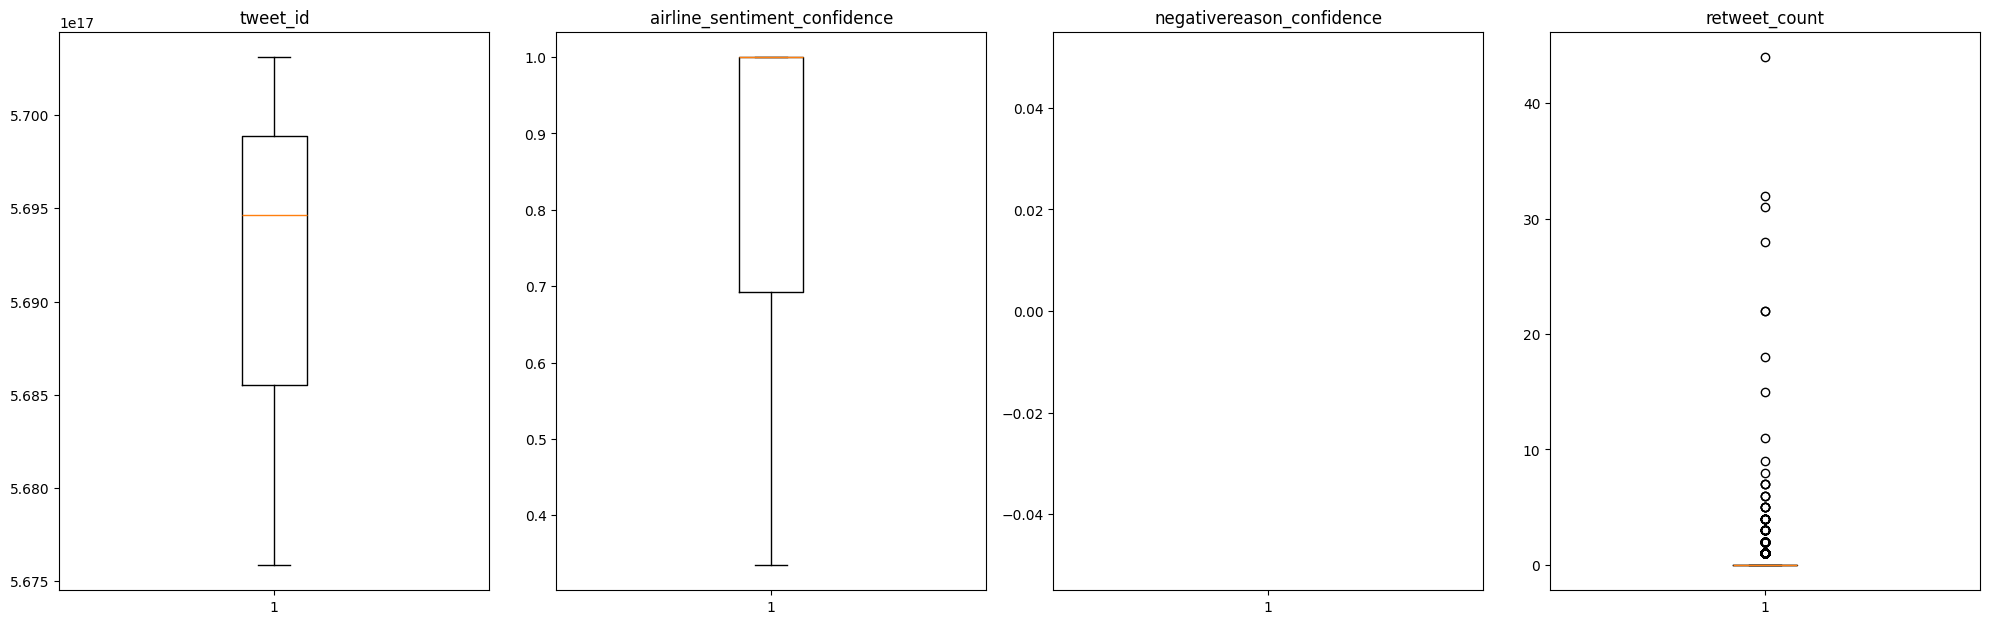

In [25]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

<span style="color:blue"> Since we are attempting to evaluate Sentiment, the outliers woudld seem to be useful to retain </span>

## Exploratory Data Analysis 

#### Missing Values

In [26]:
# check the missing values for all the columns
def return_missing_values(df_frame):
    missing_values = df_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column 
def plot_missing_values(df_frame):
    missing_values = return_missing_values(df_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

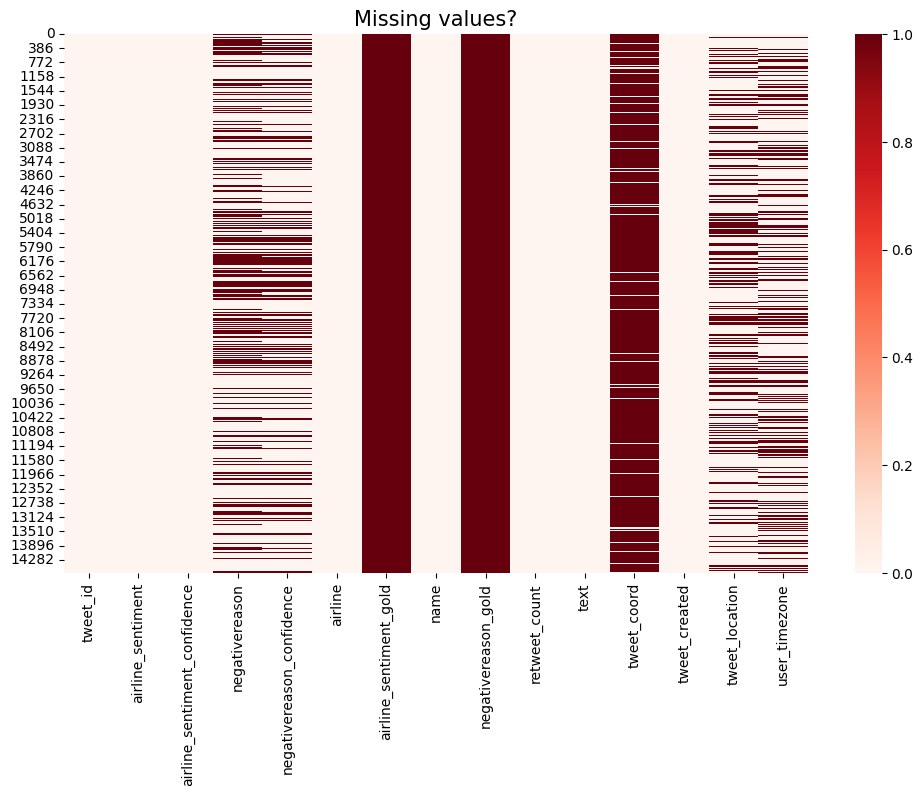

In [27]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Reds")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

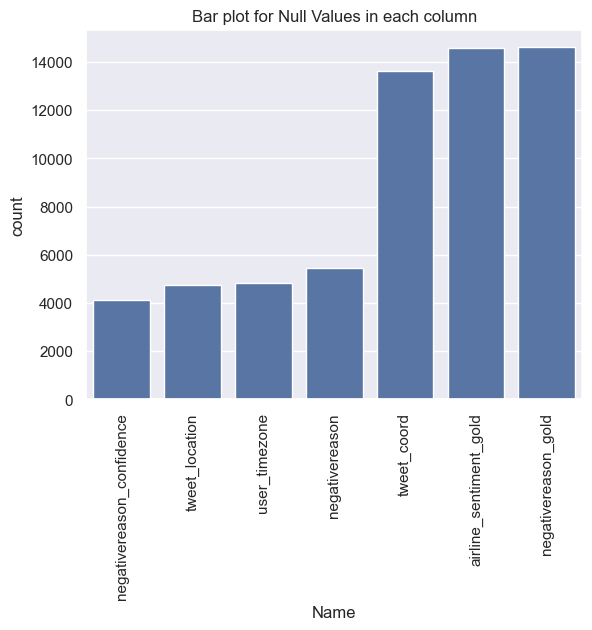

In [28]:
#plotting the count of missing values 
plot_missing_values(df)

* airline-sentiment_gold, and negativereason_gold have almost all of their values as missing
* tweet coord is missing a vast majority of the data
* sporatic missingness in negativereason, negativereason_confidence, tweet_location, user_timezone

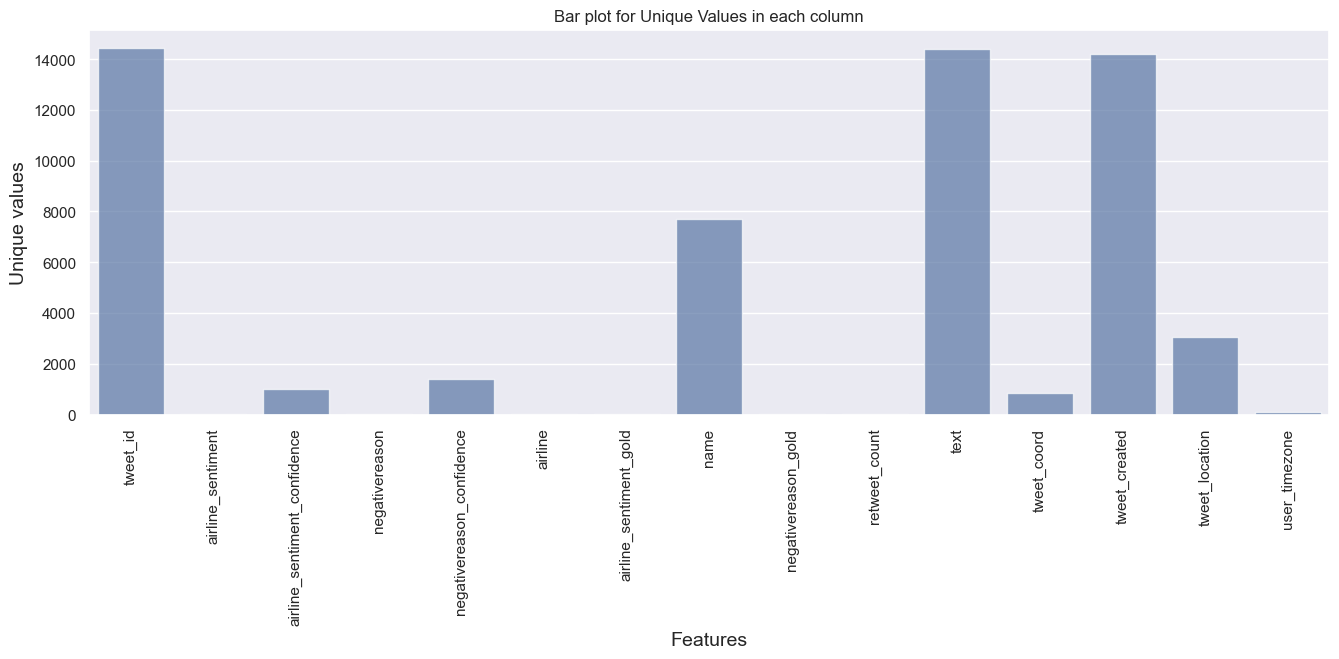

In [29]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

unidf = return_unique_values(data)

# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

* Unique values are most prevailent in text, tweet_created, tweet_id and name. 
- text, makes sense because it is the tweet itself
- tweet_created is a continuous variable so it makes sense that having uniqueness would exist with time
- tweet_id is similar to a name, in fact its more unique as it would specifically obtain the user
- name , there could be and is individuals that share the same name- however its pretty clear that they are different users since the tweet_id reflect a different story

#### Univariate Analysis 

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

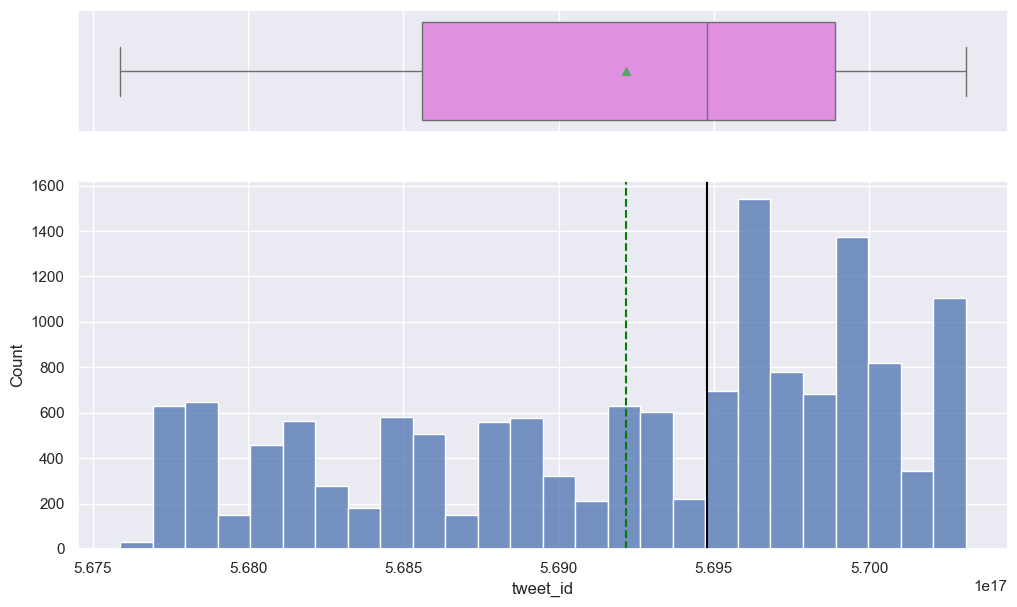

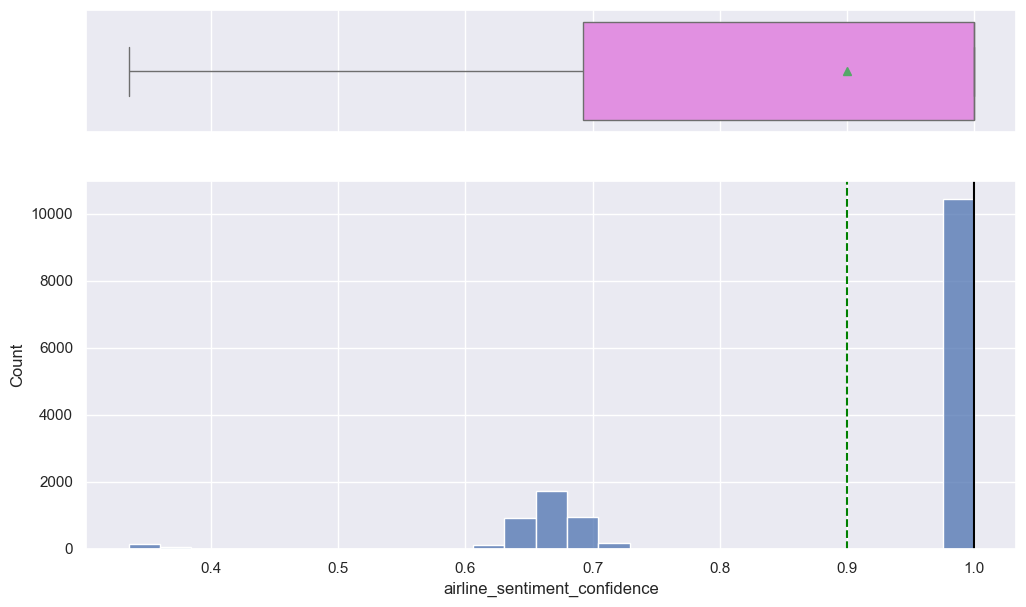

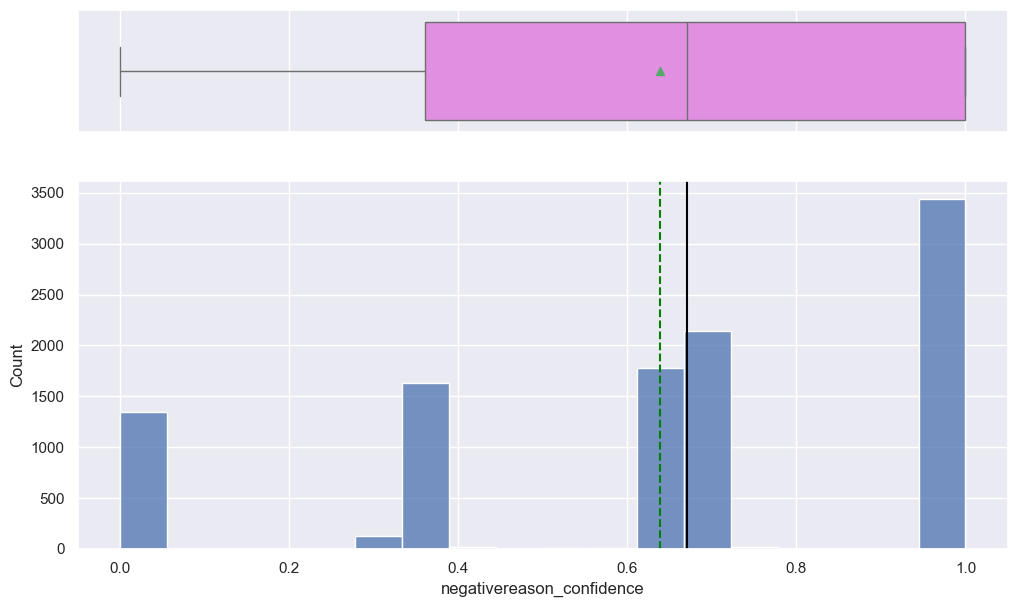

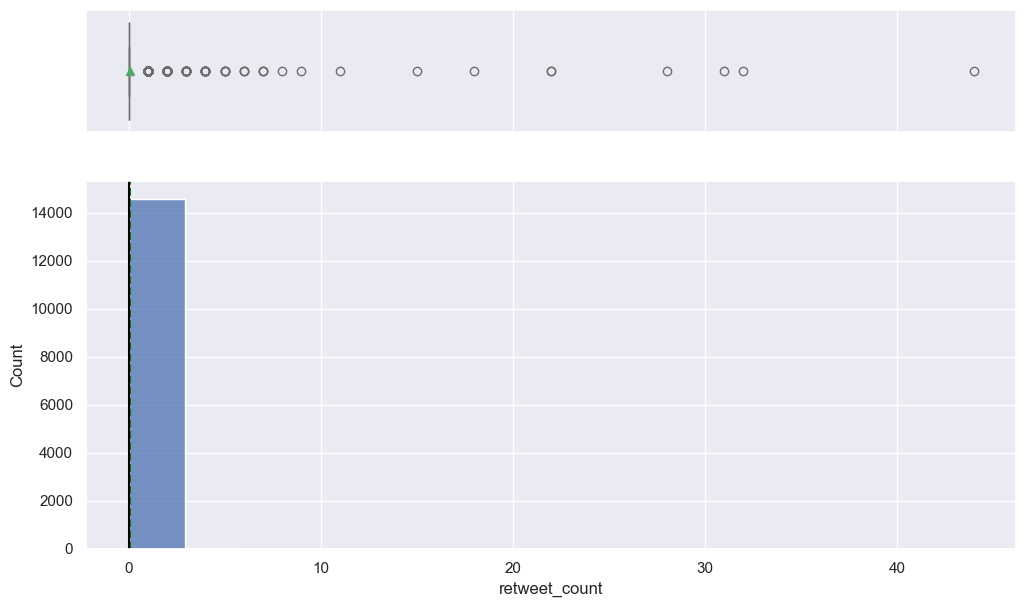

In [31]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

* tweet_id looks to be skewed to the left
* airline_sentiment_confidence is skewed toward a 1
* negative_reason_confidence is skewed toward understanding the negativity
* retweet count shows many outliers and mostly that its rare to retweet.

In [32]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<span style="color:red"> Some of the variables will have too many observations to properly graph ( such as name and text as examples) </span>

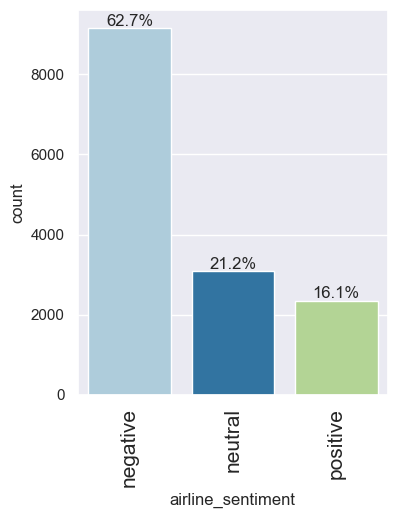

In [33]:
# airline_sentiment
labeled_barplot(data,"airline_sentiment",perc=True)

* Negative sentiment is clearly the leading indicator at 62.7
- it might be inferred that individuals are more likely to negatively tweet rather than to express other emotions of neutrality or positivity

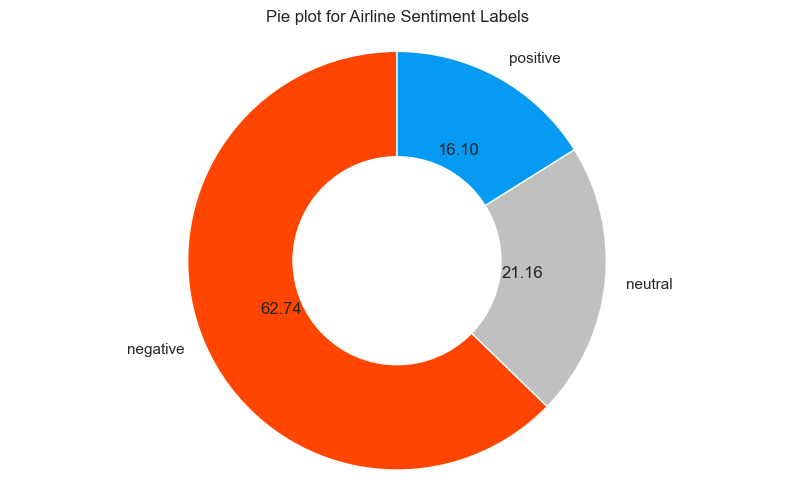

In [34]:
#plot for text for airlines Labels
#Using matplotlib
colors = ['#FF4500', '#C0C0C0', '#069AF3']
# found colors at https://matplotlib.org/stable/tutorials/colors/colors.html
sns.set(rc={'figure.figsize':(8.1,5.17)})
plot = plt.pie(data['airline_sentiment'].value_counts(), labels=data['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for Airline Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()


<span style="color:blue"> Clearly individuals are inspired to tweet if they have a negative view </span>

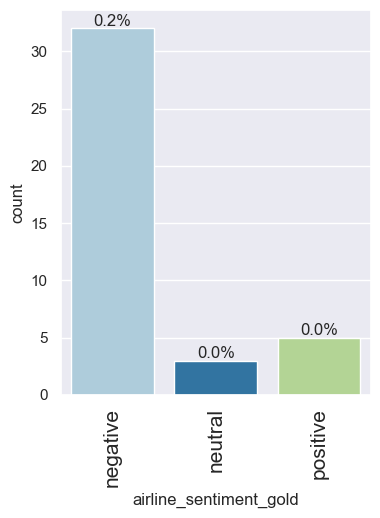

In [35]:
# airline_sentiment_gold 
labeled_barplot(data,"airline_sentiment_gold",perc=True)

<span style="color:blue"> Similar but not exactly the same as airline_sentiment. However this variable has many missing values. </span>

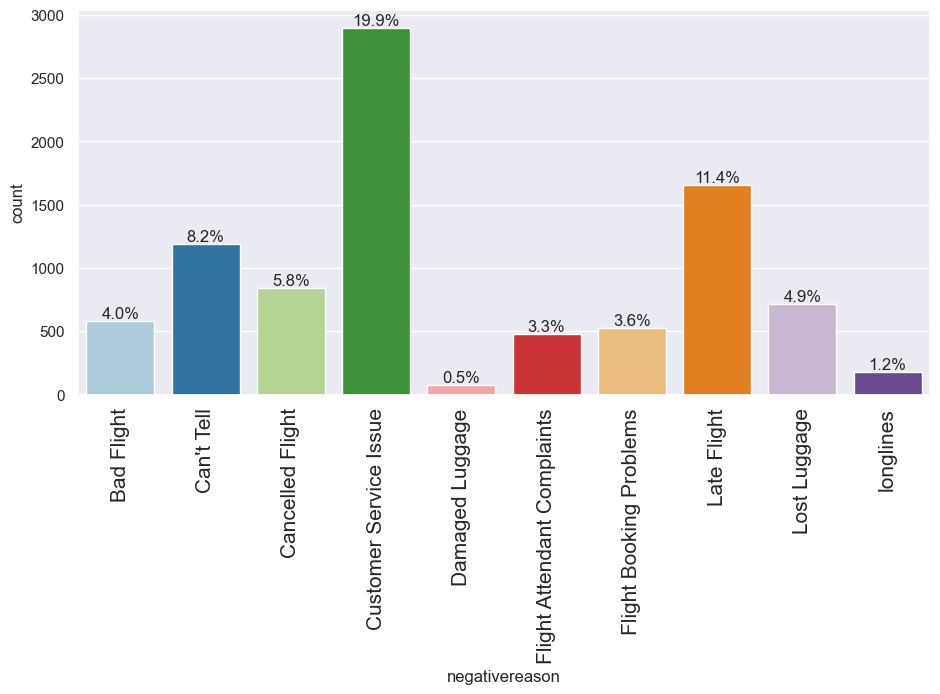

In [36]:
# airline_sentiment
labeled_barplot(data,"negativereason",perc=True)

<span style="color:blue"> TOP 6 "negative reasons" for tweet
   - 1.Customer Service is 19.9%
   - 2.Late Flights account for 11.4%
   - 3.Customer Can't tell- 8.2%
   - 4.Cancelled Flight- 5.8%
   - 5.Lost Luggage - 4.9%
   - 6.Bad Flight - 4% </span>

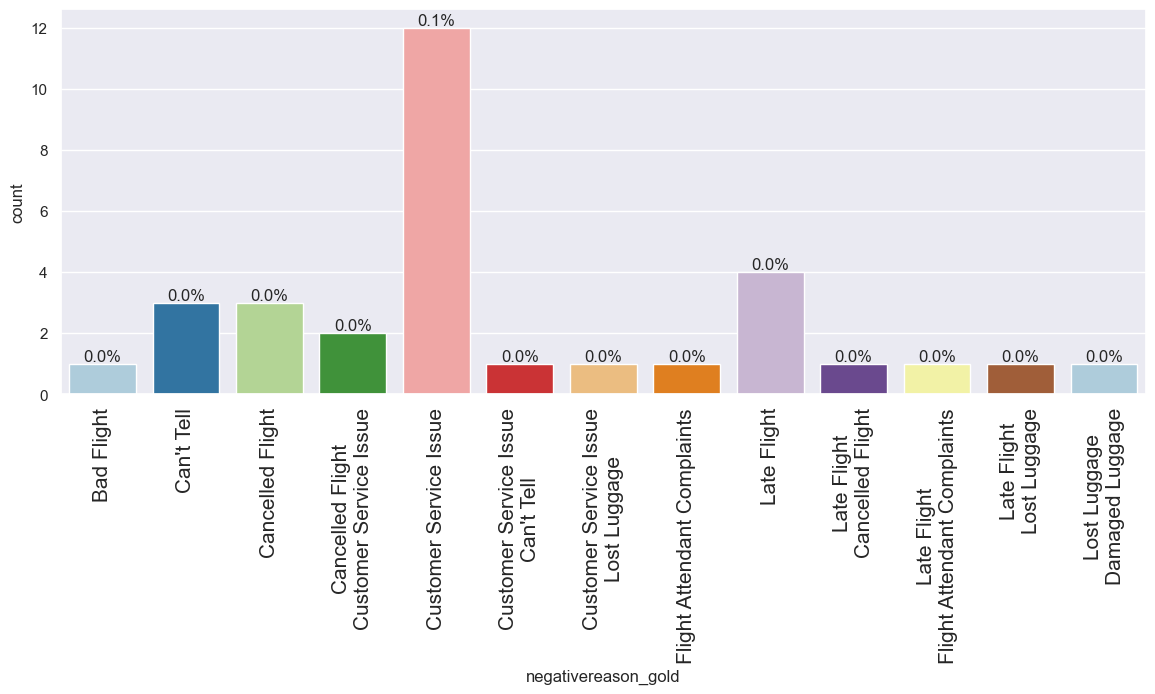

In [37]:
# negativereason_gold
labeled_barplot(data,"negativereason_gold",perc=True)

<span style="color:blue"> * negativereason_gold reflects similar to negativereason- problem with this variable is the lack of data so its not as reliable </span>

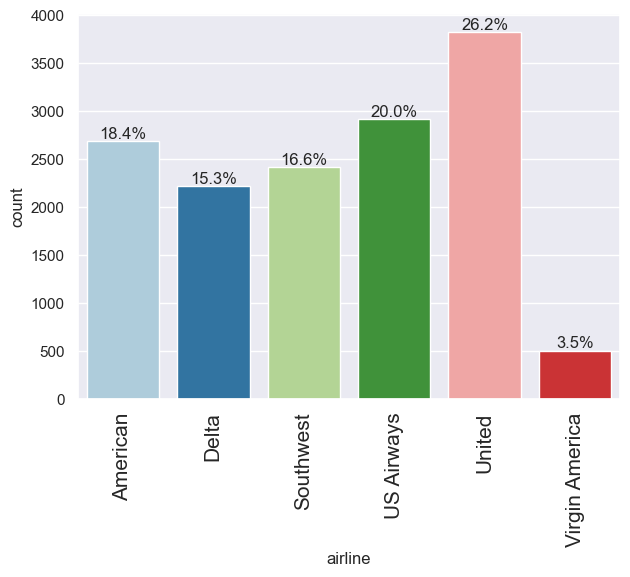

In [38]:
# airline involved in tweet
labeled_barplot(data,"airline",perc=True)

<span style="color:blue"> Airlines involved in tweet
 <span style="color:blue">  1.United - 26.2%</span>
 <span style="color:blue">  2.US Airways - 20%</span>
 <span style="color:blue">  3.American - 18.4%</span>
 <span style="color:blue">  4.Southwest - 16.6%</span>
 <span style="color:blue">  5.Delta - 15.3%</span>
 <span style="color:blue">  6.Virgin America 3.5% </span>

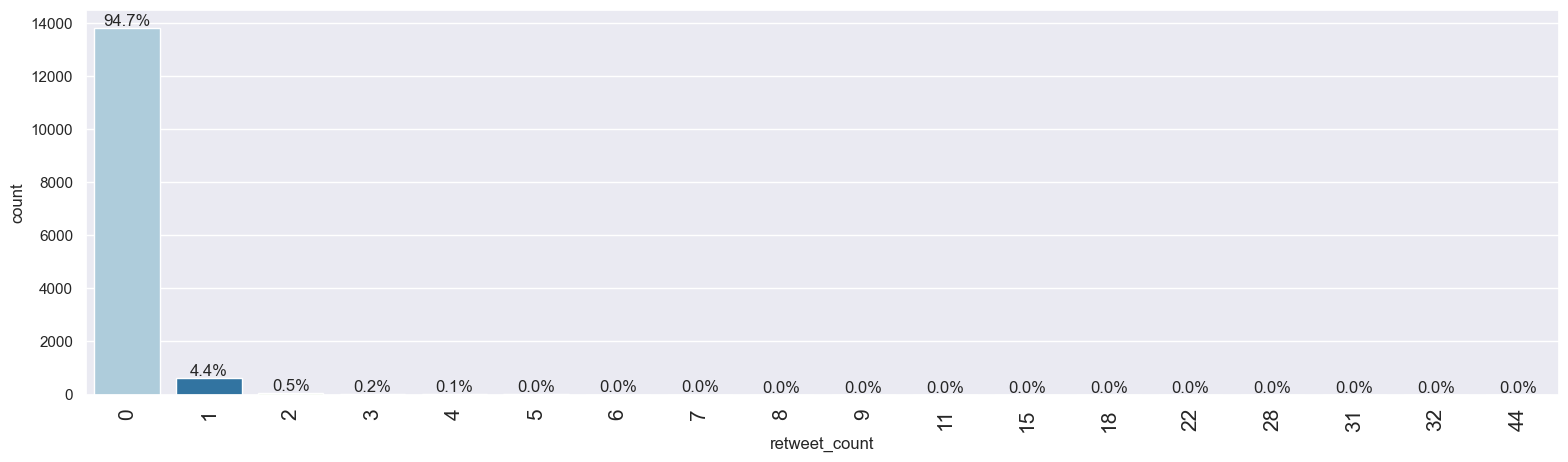

In [39]:
# percent of retweet counts
labeled_barplot(data,"retweet_count",perc=True)

 <span style="color:blue"> Its rare for a tweet to be retweeted </span>

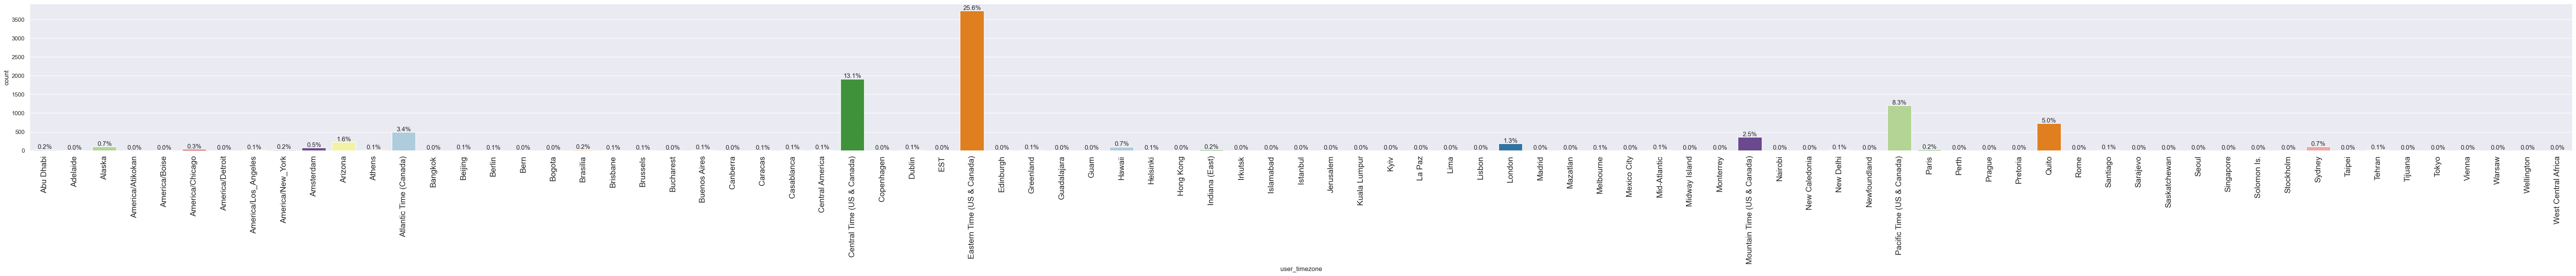

In [40]:
# airline involved in tweet
labeled_barplot(data,"user_timezone",perc=True)

 <span style="color:blue"> Eastern Time zone in the United States accounts for 25.6% and the Central Time Zone counts for 13.2% </span>

In [41]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 19:35:52,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 19:15:59,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 19:15:48,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 19:15:36,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 19:14:45,NaN,Pacific Time (US & Canada)


In [42]:
print(data['tweet_created'].isnull().sum())

0


In [43]:
df = data.sort_values(['tweet_created'])

In [44]:
df['day'] = df['tweet_created'].astype(str).str.split(' ', expand=True)[0]

In [45]:
ds = df['day'].value_counts().reset_index()  # get the count of no of tweets for every day
ds.columns = ['day', 'count']
ds = ds.sort_values(['day'])

In [46]:
ds['day'] = ds['day'].astype(str)

In [47]:
ds

,day,count
7,2015-02-17,953
5,2015-02-18,1416
6,2015-02-19,1298
3,2015-02-20,1512
4,2015-02-21,1418
1,2015-02-22,2392
0,2015-02-23,3515
2,2015-02-24,2064


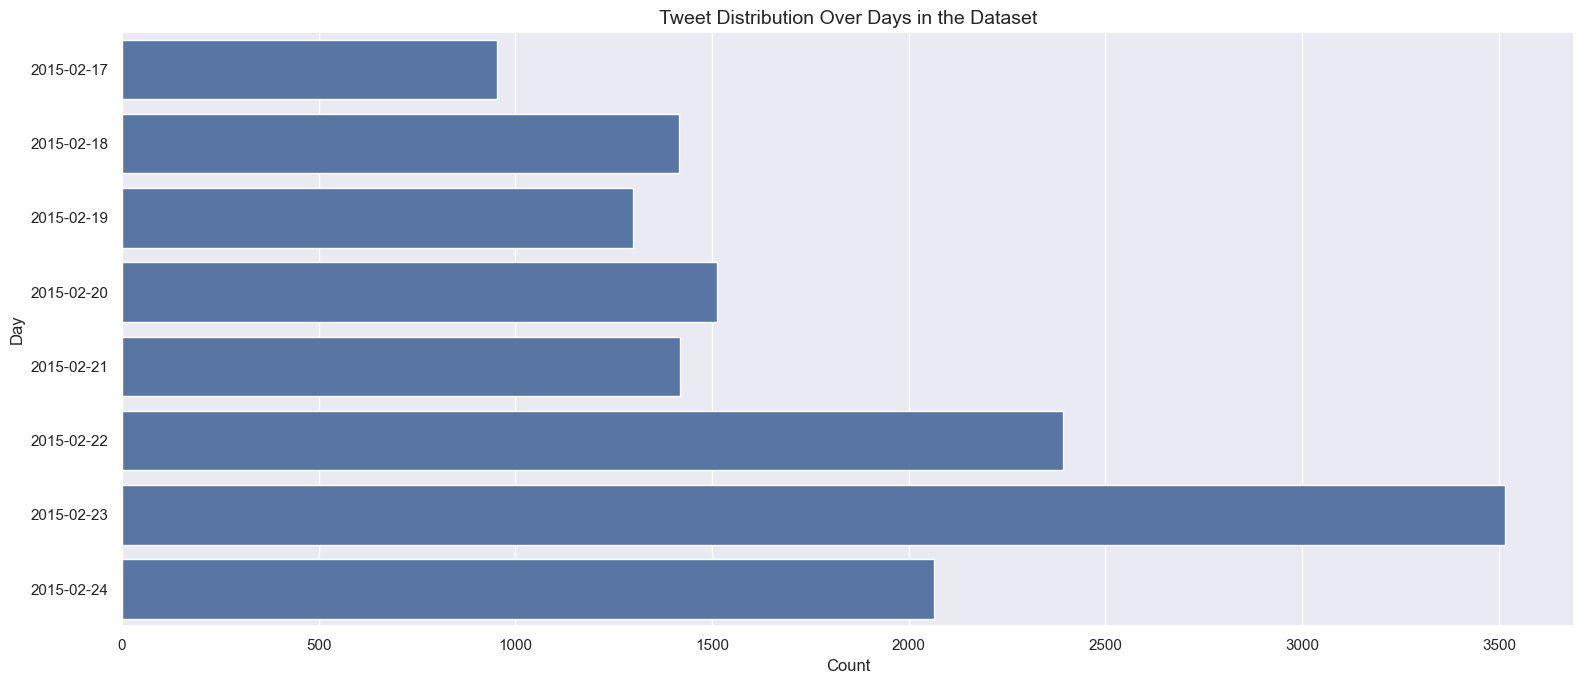

In [48]:
plt.figure(figsize=(16, 7))
# a horizontal bar plot
sns.barplot(x=ds['count'], y=ds['day'], orient='h')

# Title of labels
plt.title("Tweet Distribution Over Days in the Dataset", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Day", fontsize=12)

# Showing the plot
plt.tight_layout()  # Adjust the layout to ensure everything fits without overlapping
plt.show()

* tweet count clearly increased from 2/17 then jumped on 2/22. We investigated to see the weather for that specific day and the weekday vs weekend mix

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'Hour 0'),
  Text(1, 0, 'Hour 1'),
  Text(2, 0, 'Hour 2'),
  Text(3, 0, 'Hour 3'),
  Text(4, 0, 'Hour 4'),
  Text(5, 0, 'Hour 5'),
  Text(6, 0, 'Hour 6'),
  Text(7, 0, 'Hour 7'),
  Text(8, 0, 'Hour 8'),
  Text(9, 0, 'Hour 9'),
  Text(10, 0, 'Hour 10'),
  Text(11, 0, 'Hour 11'),
  Text(12, 0, 'Hour 12'),
  Text(13, 0, 'Hour 13'),
  Text(14, 0, 'Hour 14'),
  Text(15, 0, 'Hour 15'),
  Text(16, 0, 'Hour 16'),
  Text(17, 0, 'Hour 17'),
  Text(18, 0, 'Hour 18'),
  Text(19, 0, 'Hour 19'),
  Text(20, 0, 'Hour 20'),
  Text(21, 0, 'Hour 21'),
  Text(22, 0, 'Hour 22'),
  Text(23, 0, 'Hour 23')])

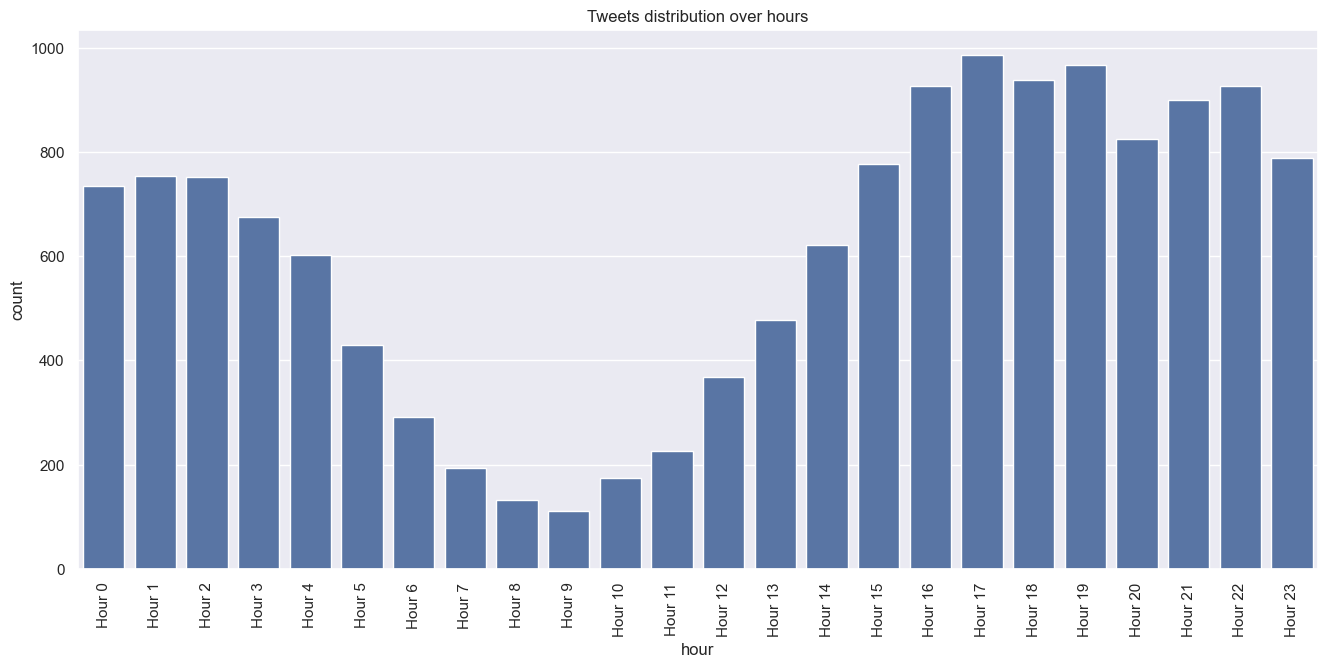

In [49]:
# When are tweets created? 
df['tweet_created'] = pd.to_datetime(df['tweet_created']) #change the format into datetime readable
df['hour'] = df['tweet_created'].dt.hour    # get the hour of every tweet
ds = df['hour'].value_counts().reset_index()  # get the count of no of tweets for every hour
ds.columns = ['hour', 'count']
ds = ds.sort_values(['hour'])
ds['hour'] = 'Hour ' + ds['hour'].astype(str)
plt.figure(figsize=(16, 7))
fig = sns.barplot( 
    x=ds["hour"], 
    y=ds["count"], 
    orientation='vertical', 
).set_title('Tweets distribution over hours')
plt.xticks(rotation='vertical')

<span style="color:blue">** tweets are most prevailent during the hours 6 thorugh hour 20.** </span>

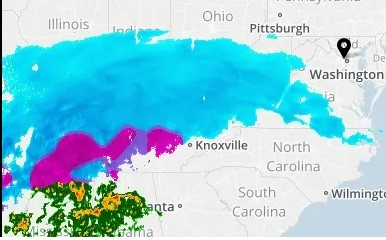

In [50]:
from IPython.display import Image
Image(filename='Storm.jpg')

<span style="color:blue">* from 2-23-2015- 2024-2015 a spike in tweets were made. After some investigation it was discovered that a massive amount of flight delays occurred due to a blizzard https://www.usatoday.com/story/todayinthesky/2015/02/16/flight-cancellations-at-600-and-counting-from-new-storm/23488003/. The picture above is a radar screen shot on 2/16/2015. ( source USATODAY )</span>

#### Bivariate Analysis 

In [51]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [52]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9140     3083      2345  14568
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1922      447       318   2687
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


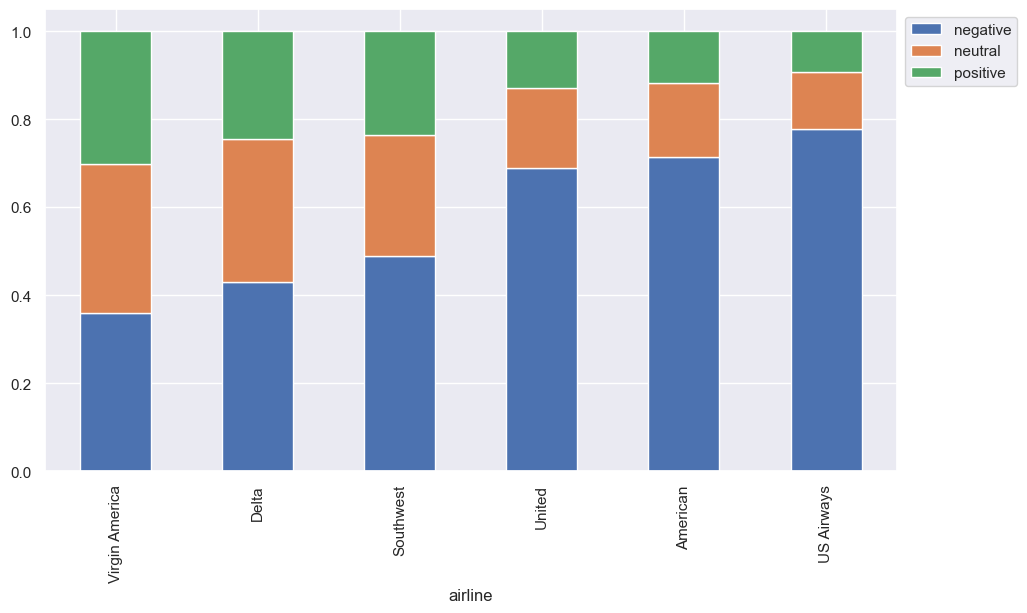

In [53]:
stacked_barplot(data,"airline", "airline_sentiment")

* US Airways has a higher proportion of negative sentiments
* Virgin America has the best proportion of positive tweets vs Negative
* United and American are very similar 

negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
airline                                                    
All                    580        1190               839   
United                 216         379               181   
Southwest               90         159               162   
American                87         198               238   
Delta                   64         186                51   
US Airways             104         246               189   
Virgin America          19          22                18   

negativereason  Customer Service Issue  Damaged Luggage  \
airline                                                   
All                               2898               74   
United                             681               22   
Southwest                          391               14   
American                           756               12   
Delta                              199               11   
US Airways                         811        

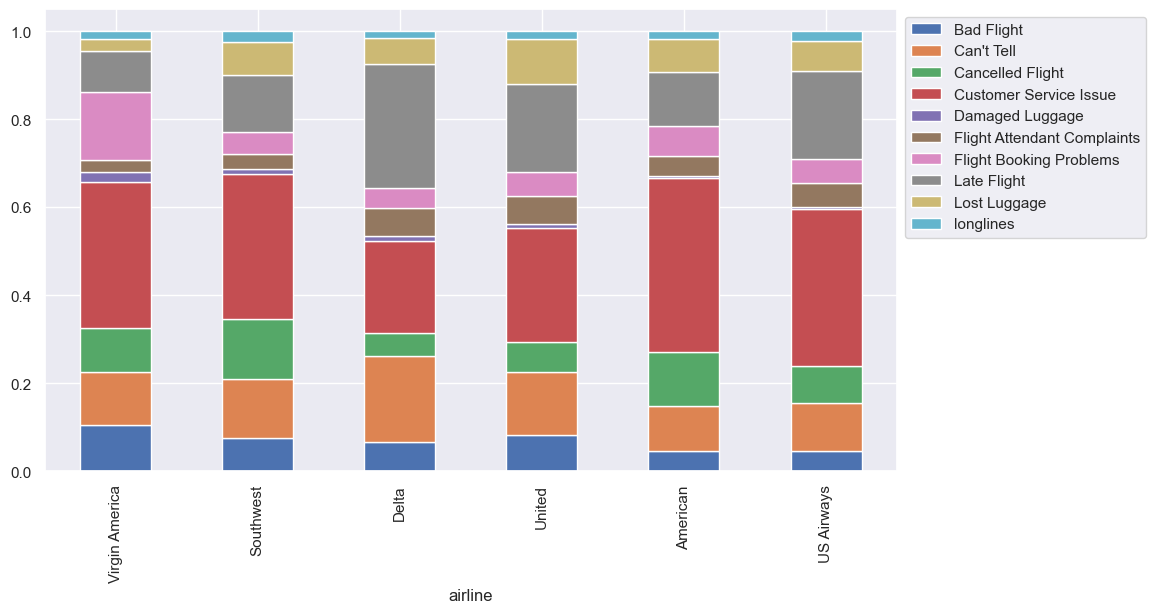

In [54]:
stacked_barplot(data,"airline", "negativereason")

* Virgin America has the highest percentage of booking problems
* Delta has the fewest percentage of Customer Service problems
* Delta and American have the highest percentage of cancelled flights associated with sentiment

In [55]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 19:35:52,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 19:15:59,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 19:15:48,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 19:15:36,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 19:14:45,NaN,Pacific Time (US & Canada)


negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
retweet_count                                              
All                    580        1190               839   
0                      541        1099               795   
1                       35          74                33   
4                        0           3                 2   
2                        2           4                 7   
3                        2           5                 1   
5                        0           0                 1   
7                        0           1                 0   
18                       0           1                 0   
22                       0           1                 0   
31                       0           1                 0   
32                       0           1                 0   
44                       0           0                 0   

negativereason  Customer Service Issue  Damaged Luggage  \
retweet_count                           

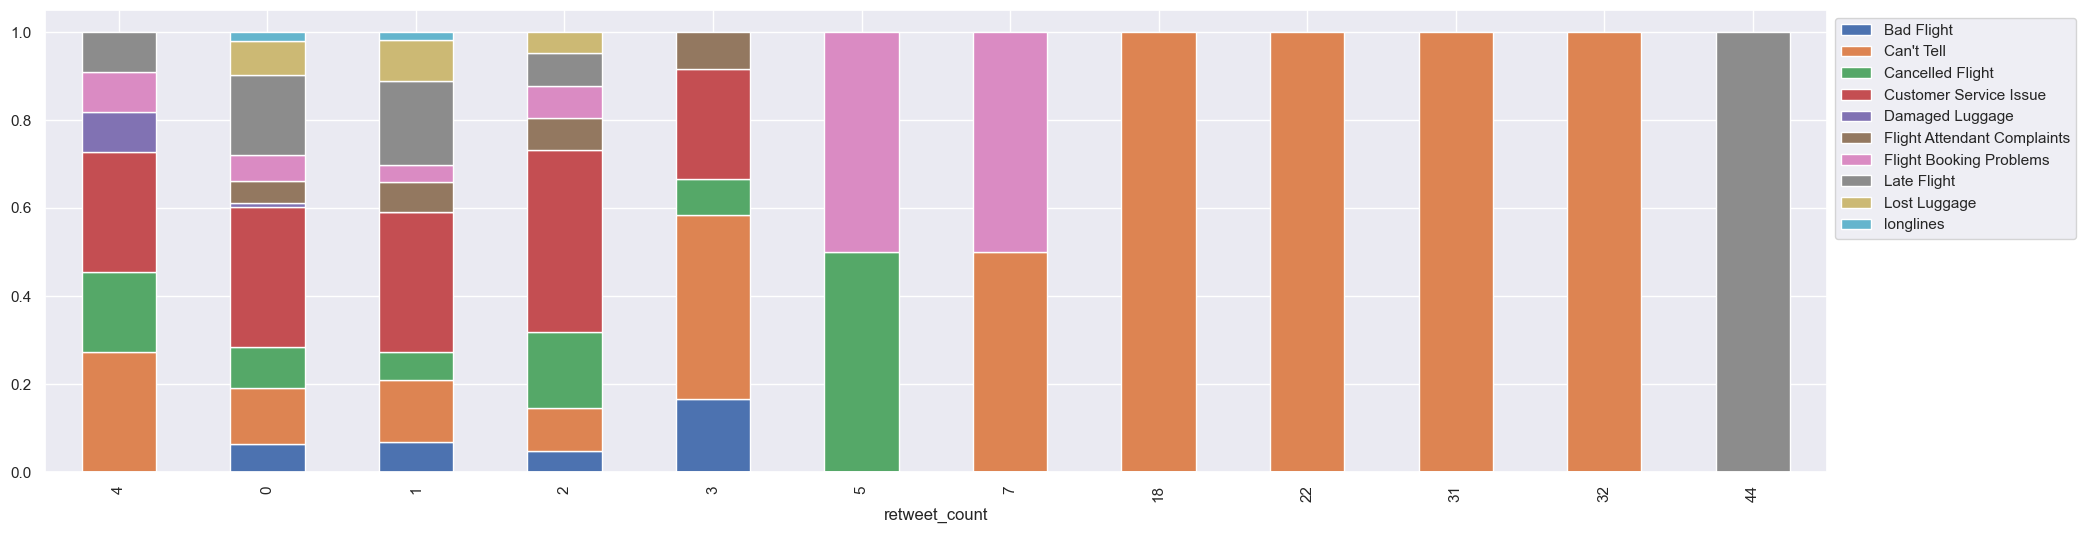

In [56]:
stacked_barplot(data,"retweet_count","negativereason")

* Customer Service issues continue to show negative sentiment has traction.
* Damaged Luggage is another high percentage of problems

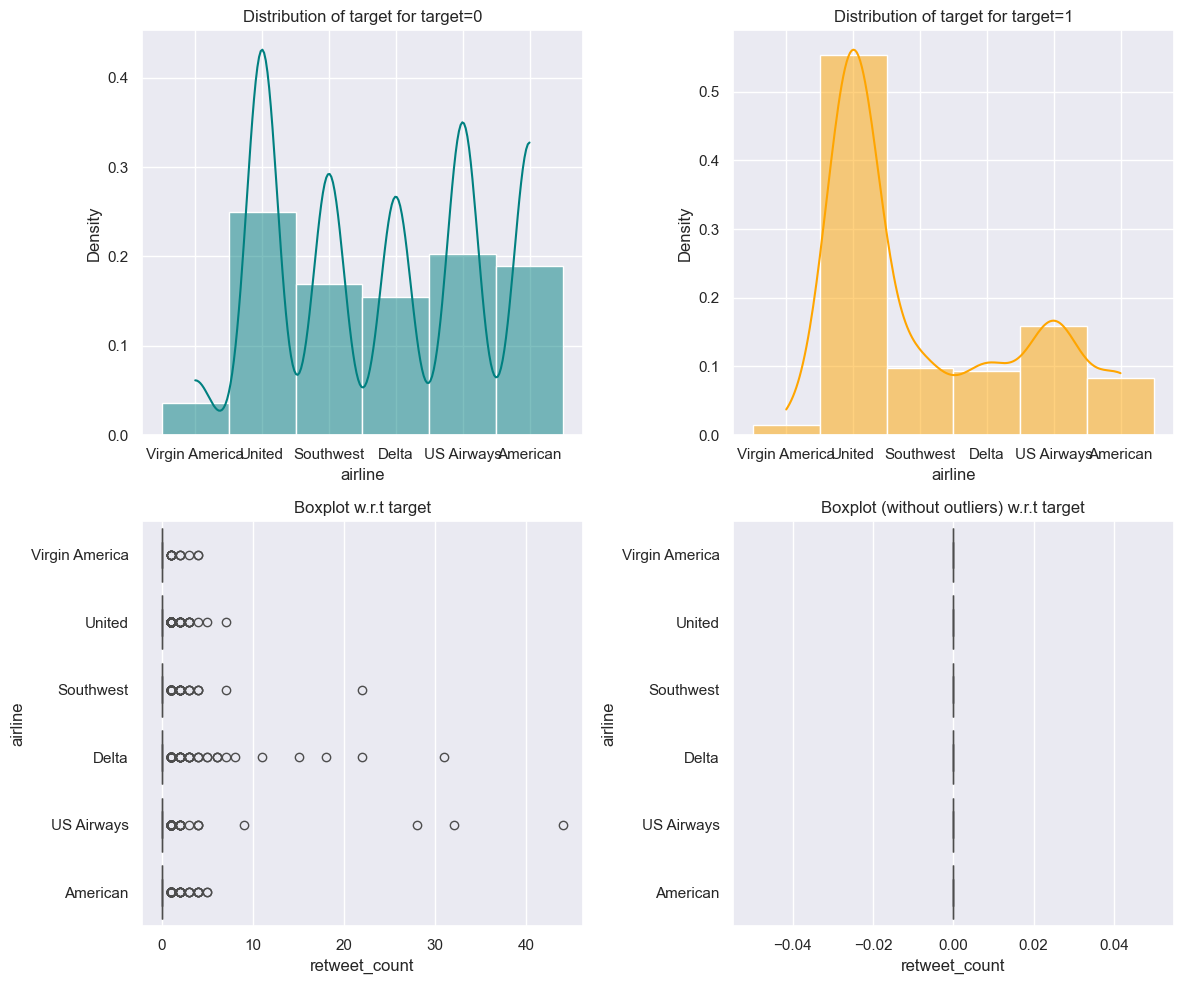

In [57]:
distribution_plot_wrt_target(data,"airline","retweet_count")

* United has the most retweets by volume
* US Airways has the second highest

### Word Cloud

In [58]:
from wordcloud import WordCloud,STOPWORDS

### Positive Reviews

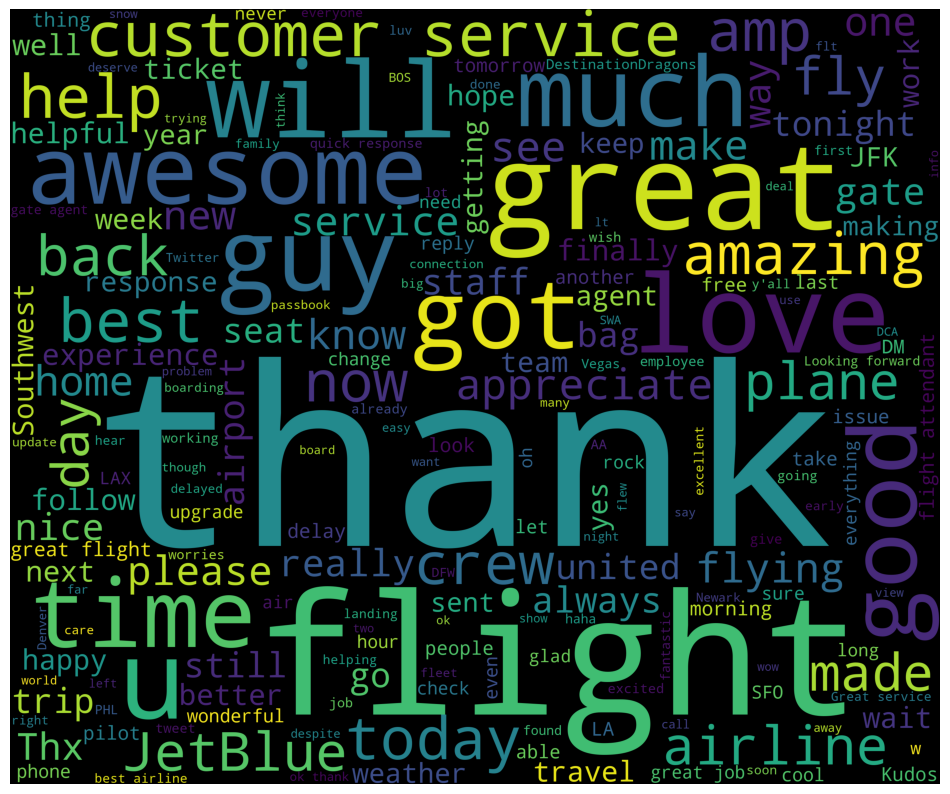

In [59]:
new_df=data[data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

 <span style="color:blue"> * awesome, thank, love, flight, time, great, good, happy, guy, customer service were some of the words expressed on positive reviews </span>

* these words follows positive interactions, customer service, words that express gratitude and responsiveness. Customer service seems to be a critical element to a good experience. 

### Neutral Reviews

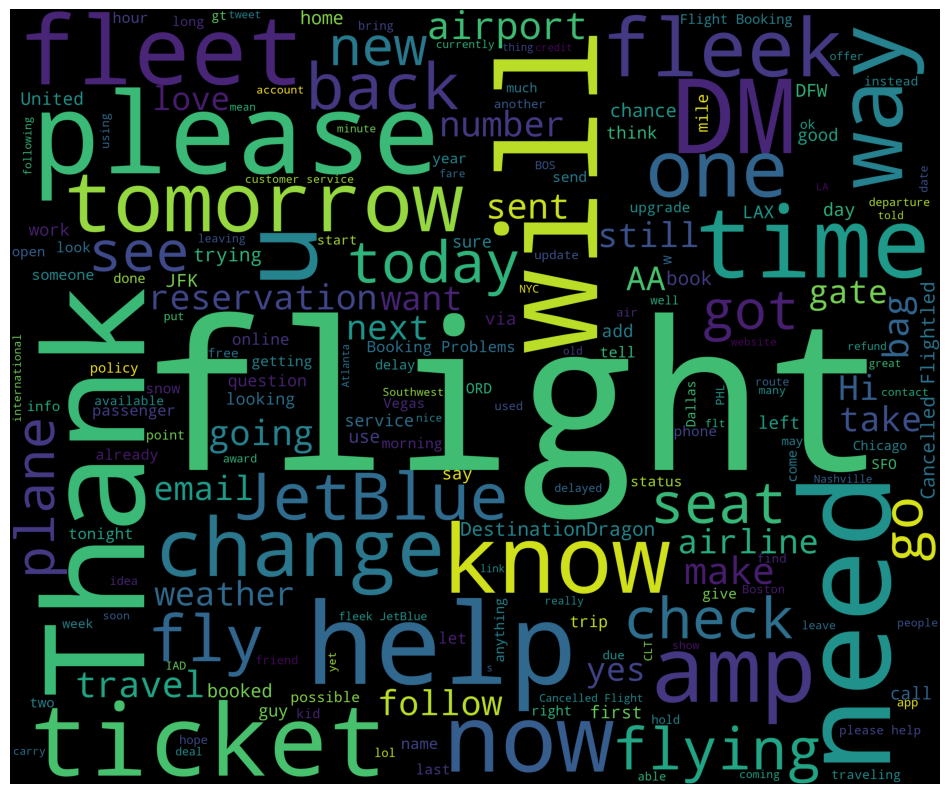

In [60]:
new_df=data[data['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

 <span style="color:gray"> * flight, Thank, need,please, will, ticket, change, time, know, JetBlue, tomorrow were some of the words expressed on neutral reviews </span>

* neutral reviews seem to reflect similar words from positive and negative reviews but they also appear to be more oriented toward tasks. A neutral reviewer seems to have a issue or question and they are getting the response without a inflection of other types of drama. Customer Service seems to be important once again. 

### Negative Reviews

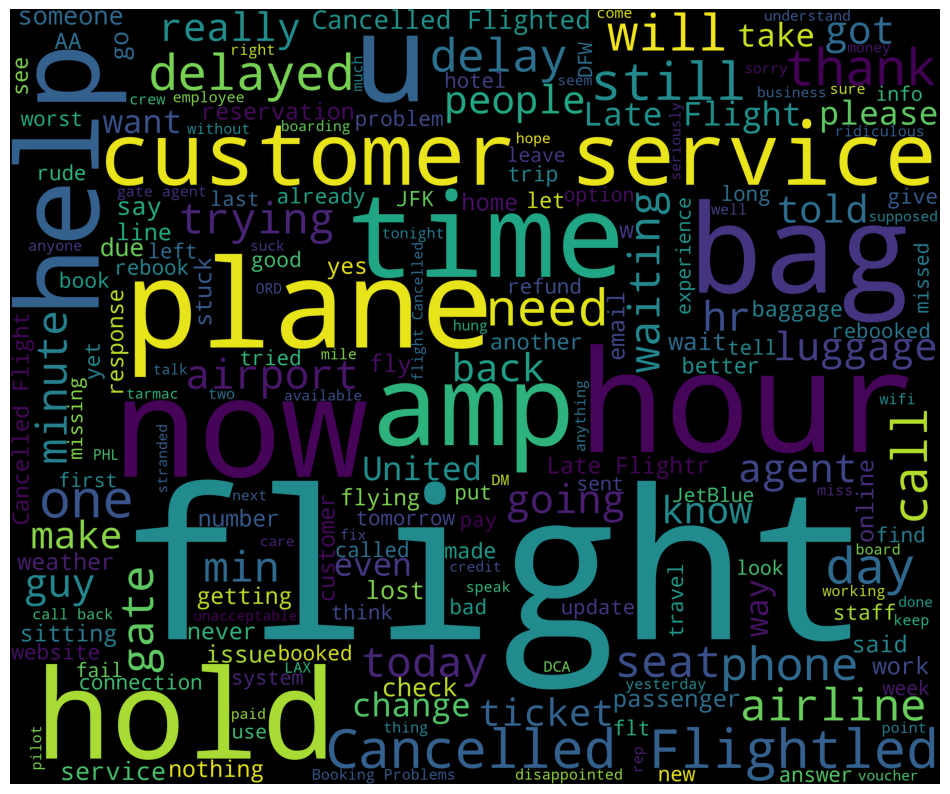

In [61]:
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

 <span style="color:red"> * flight,hold,customer service, plane, hour, bag, help, now, hold and time were some of the words expressed on neutral reviews </span>

* While similar to Positive and Neutral reviews, customer service seems to be extremely important in this particular observation.However it would also appear that other factors may be impacting this sentiment. Flight, now, bag, plane, time, cancelled flight, late flight, delayed are other factors on the execution of the service. 

### **Text Pre-processing:**

- dropping variables that need to be dropped
- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

#### We have 3 observations where a vast majority of variables are null- we will eliminate these variables 

In [62]:
data= data.drop('negativereason_gold',axis=1)

In [63]:
data= data.drop('airline_sentiment_gold',axis=1)

In [64]:
data = data.drop('tweet_coord', axis = 1)

#### For our purposes we can drop the name and tweet_ID 

In [65]:
data= data.drop('tweet_id',axis=1)

### Per instructions we are dropping all columns except "text" and "airline_sentiment"

In [66]:
data= data.drop('airline_sentiment_confidence',axis=1)

In [67]:
data= data.drop('negativereason',axis=1)

In [68]:
data= data.drop('negativereason_confidence',axis=1)

In [69]:
data= data.drop('airline',axis=1)

In [70]:
data= data.drop('name',axis=1)

In [71]:
data= data.drop('retweet_count',axis=1)

In [72]:
data= data.drop('tweet_created',axis=1)

In [73]:
data= data.drop('tweet_location',axis=1)

In [74]:
data= data.drop('user_timezone',axis=1)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14568 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14568 non-null  object
 1   text               14568 non-null  object
dtypes: object(2)
memory usage: 341.4+ KB


In [76]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 14568 rows and 2 columns.


In [77]:
#copy of data
data2 = data.copy()

In [78]:
data= data2

In [79]:
data.shape

(14568, 2)

In [80]:
# Remove HTML Tag
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))


data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [81]:
# Remove Numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))


data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [82]:
# Tokenization
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."


In [83]:
# Removing stop words while retaining a custom list which adds value to Sentiment
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stopwords = list(set(stopwords) - set(customlist))     

In [84]:
print(stopwords)

['until', 'they', 'are', 'some', "you've", 'be', "that'll", 'my', 'am', 'you', 'their', 'most', 'no', 'any', 'above', 'down', 'for', 'don', 'through', 'our', 'on', 'or', 'before', 'to', 'each', 'from', 'y', "should've", 'only', 'ain', 'between', 'so', 'does', 'against', 'after', 'just', 'themselves', 'them', 'off', 'such', 'which', 'at', 've', 'into', 'why', 'while', "it's", "you're", 'because', 'couldn', 'but', 't', 'who', 'myself', 'the', 'once', 'o', 'yours', 'do', 'here', 'during', 'll', 'm', 'out', 'been', 'nor', 'an', 'very', 'him', 'should', 'other', 'now', 'will', 'that', 'we', 'by', 'where', 'is', 'its', 'having', 'd', "you'd", 'both', 'than', 'your', 'himself', 'have', 'itself', 'these', 'her', 'it', 'a', 'with', 'how', 'hers', 'when', 'and', 'this', 'all', 'those', 're', 'yourself', 'theirs', 'what', "don't", 'his', 'further', 'over', 'more', 'same', 'ourselves', 'about', 'own', 'yourselves', 'again', 'she', 'he', 'in', "you'll", 'there', "aren't", 'of', 'few', 'me', 'doing'

In [85]:
import nltk

nltk.download('omw')

[nltk_data] Downloading package omw to C:\Users\Frederick
[nltk_data]     Duff\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [86]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica nt today must mean need take ano...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


### Supervised Learning for Sentiment Analysis

### **Bag of Words (CountVectorizer)**
      
In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are **d** unique words in our dictionary then for every review the vector will be of length **d** and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.


In [87]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer()                
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [88]:
data_features.shape       #Shape of the feature vector

(14568, 12032)

In [89]:
data['airline_sentiment'] = data['airline_sentiment'].replace('positive', 2 )
data['airline_sentiment'] = data['airline_sentiment'].replace('neutral', 1 )
data['airline_sentiment'] = data['airline_sentiment'].replace('negative', 0)

In [90]:
data.head()

,airline_sentiment,text
0,1,virginamerica dhepburn say
1,2,virginamerica plus add commercials experience ...
2,1,virginamerica nt today must mean need take ano...
3,0,virginamerica really aggressive blast obnoxiou...
4,0,virginamerica really big bad thing


In [91]:
labels = data['airline_sentiment']
labels = labels.astype('int')

In [92]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.25, random_state=42)

In [93]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7132058101472996


#### Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [94]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [95]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

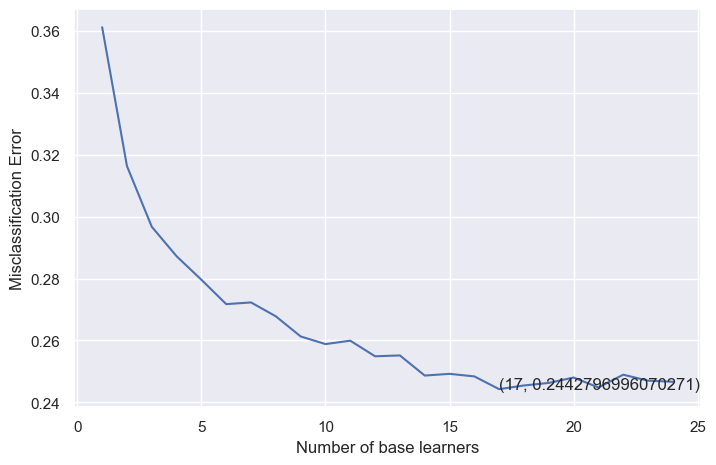

In [96]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [97]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7633168588687534

In [98]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2113  154   58]
 [ 345  336   61]
 [ 164   80  331]]
0.7633168588687534


<Axes: >

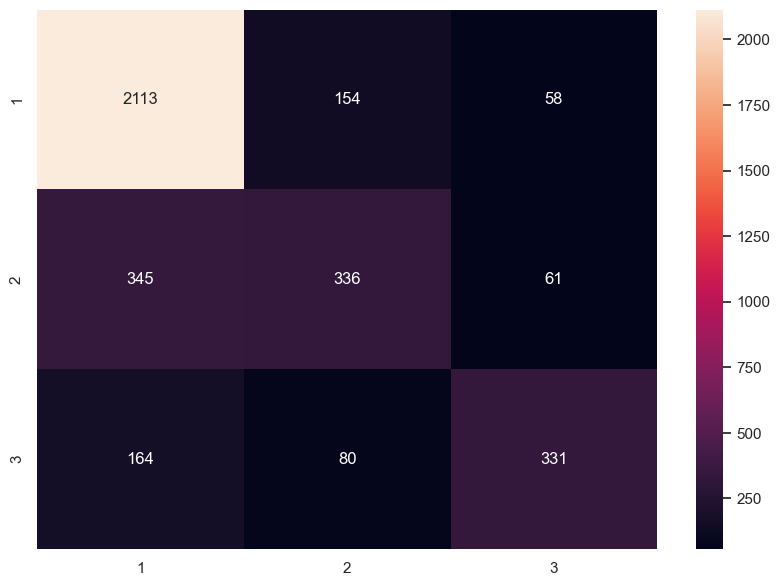

In [99]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

*Countvectorizer 
*Tweets Predicted versus Actual 
  - Negative- correctly predicted 91.61%
  - Neutral - correctly predicted 44.87%
  - Positive- correctly predicted 59.30% 

### Top 40 features

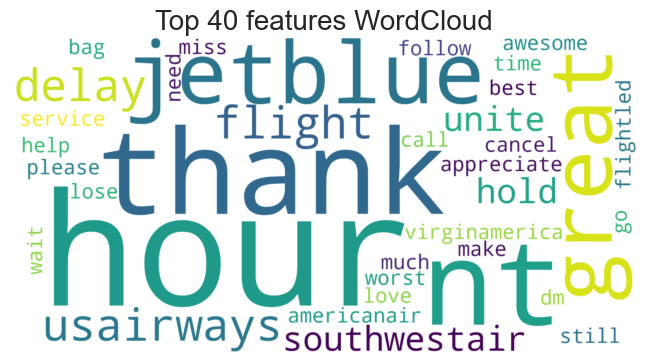

In [102]:
all_features = bow_vec.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Building the model based on CountVectorizer and Random Forest**

### **TF-IDF**

**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [104]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14568, 12032)

In [105]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.25, random_state=42)

In [106]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6926828141945757


In [107]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

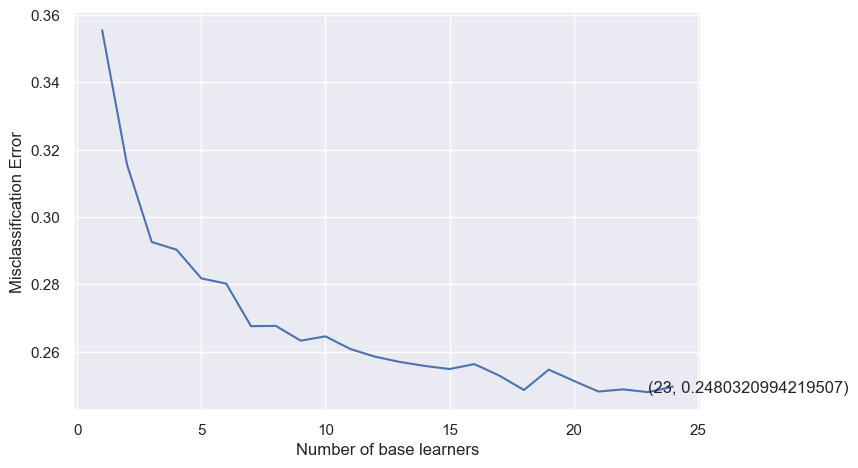

In [108]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [109]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7668863261943987

In [110]:
result = clf.predict(X_test)

[[2195  100   30]
 [ 394  305   43]
 [ 198   84  293]]
0.7668863261943987


<Axes: >

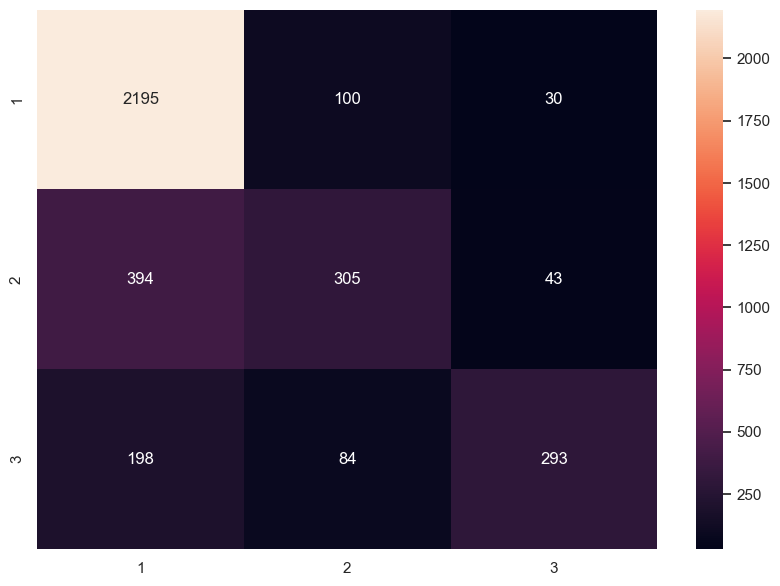

In [111]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

*TFIDF
*Tweets Predicted vs Actual
  - Negative- correctly predicted 94.58%
  - Neutral - correctly predicted 40.97%
  - Positive- correctly predicted 50.6% 


### Top 40 features

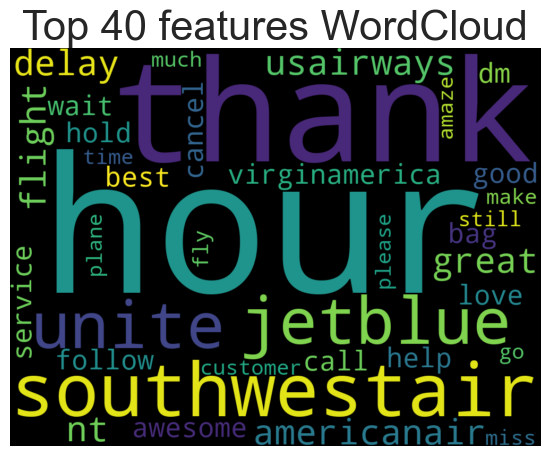

In [113]:

all_features = vectorizer.get_feature_names_out()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

### VADER

In [114]:
import nltk
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Frederick
[nltk_data]     Duff\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [115]:
data_new = data.copy()   #make a copy of dataframe and do unsupervised operations on that dataframe

In [116]:
#Calculate the polarity score of the reviews
data_new['scores'] = data_new['text'].apply(lambda review: sentiment.polarity_scores(review))

data_new.head()

,airline_sentiment,text,scores
0,1,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,virginamerica plus add commercials experience ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,1,virginamerica nt today must mean need take ano...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,0,virginamerica really aggressive blast obnoxiou...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co..."
4,0,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp..."


In [117]:
#Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head()

,airline_sentiment,text,scores,compound
0,1,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2,virginamerica plus add commercials experience ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,1,virginamerica nt today must mean need take ano...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,0,virginamerica really aggressive blast obnoxiou...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306
4,0,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829


In [118]:
#Classify the class of the review by keeping threshold on the compund score
data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,airline_sentiment,text,scores,compound,comp_score
0,1,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
1,2,virginamerica plus add commercials experience ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
2,1,virginamerica nt today must mean need take ano...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
3,0,virginamerica really aggressive blast obnoxiou...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306,0
4,0,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829,0


In [119]:
data["VADER_pred"] = data_new['comp_score'].tolist()
data.head()

,airline_sentiment,text,VADER_pred
0,1,virginamerica dhepburn say,1
1,2,virginamerica plus add commercials experience ...,1
2,1,virginamerica nt today must mean need take ano...,1
3,0,virginamerica really aggressive blast obnoxiou...,0
4,0,virginamerica really big bad thing,0


In [120]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(int)   #convert the sentiment column values into int data type
data["VADER_pred"] = data["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type
print("Accuaracy using Vader Sentiment Analysis is : ",
      accuracy_score(data["airline_sentiment"].tolist(),data["VADER_pred"].tolist()))

Accuaracy using Vader Sentiment Analysis is :  0.47213069741900054


[[4214 4926    0]
 [ 419 2664    0]
 [  97 2248    0]]


<Axes: >

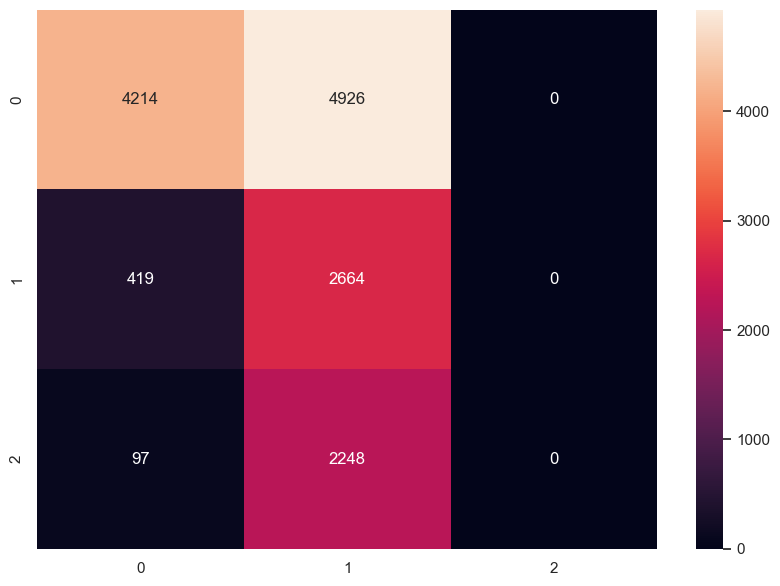

In [121]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["airline_sentiment"].tolist(), data['VADER_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## **TextBlob**

In [122]:
from textblob import TextBlob

In [123]:
data_new = data.copy()      #make a copy of dataframe and do unsupervised operations on that dataframe

In [124]:
#Calculate the polarity score of the reviews
data_new['polarity']  = data_new['text'].apply(lambda review: TextBlob(review).sentiment.polarity)

data_new.head()

,airline_sentiment,text,VADER_pred,polarity
0,1,virginamerica dhepburn say,1,0.00000
1,2,virginamerica plus add commercials experience ...,1,0.00000
2,1,virginamerica nt today must mean need take ano...,1,-0.31250
3,0,virginamerica really aggressive blast obnoxiou...,0,0.00625
4,0,virginamerica really big bad thing,0,-0.35000


In [125]:
#Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,airline_sentiment,text,VADER_pred,polarity,polarity_score
0,1,virginamerica dhepburn say,1,0.00000,1
1,2,virginamerica plus add commercials experience ...,1,0.00000,1
2,1,virginamerica nt today must mean need take ano...,1,-0.31250,0
3,0,virginamerica really aggressive blast obnoxiou...,0,0.00625,1
4,0,virginamerica really big bad thing,0,-0.35000,0


In [126]:
data["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data.head()

,airline_sentiment,text,VADER_pred,Text_Blob_pred
0,1,virginamerica dhepburn say,1,1
1,2,virginamerica plus add commercials experience ...,1,1
2,1,virginamerica nt today must mean need take ano...,1,0
3,0,virginamerica really aggressive blast obnoxiou...,0,1
4,0,virginamerica really big bad thing,0,0


In [127]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(int)  #convert the sentiment column values into int data type
data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type
print("Accuaracy of using Text Blob Sentiment Analysis is : ",
      accuracy_score(data["airline_sentiment"].tolist(),data["Text_Blob_pred"].tolist()))

Accuaracy of using Text Blob Sentiment Analysis is :  0.3859829763866008


[[2805 6335    0]
 [ 265 2818    0]
 [ 106 2239    0]]


<Axes: >

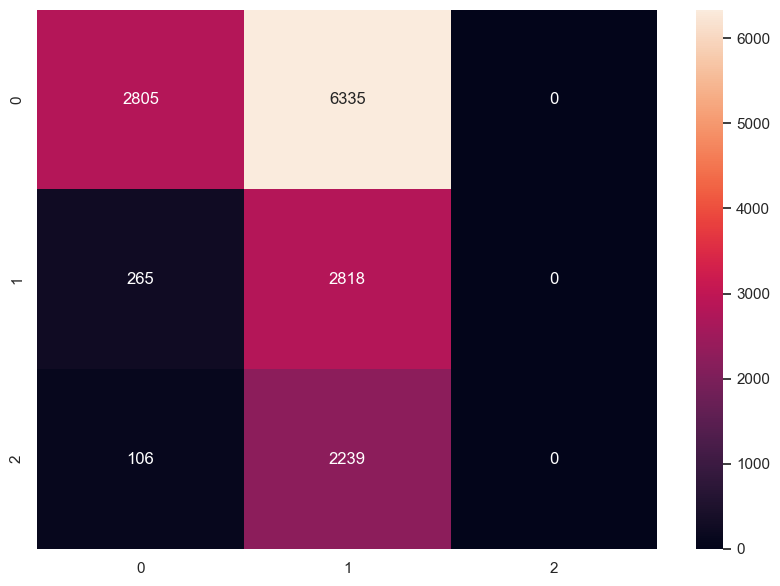

In [129]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["airline_sentiment"].tolist(), data['Text_Blob_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## **Comparing the accuracies of Unsupervised Learning methods VADER and TextBlob**

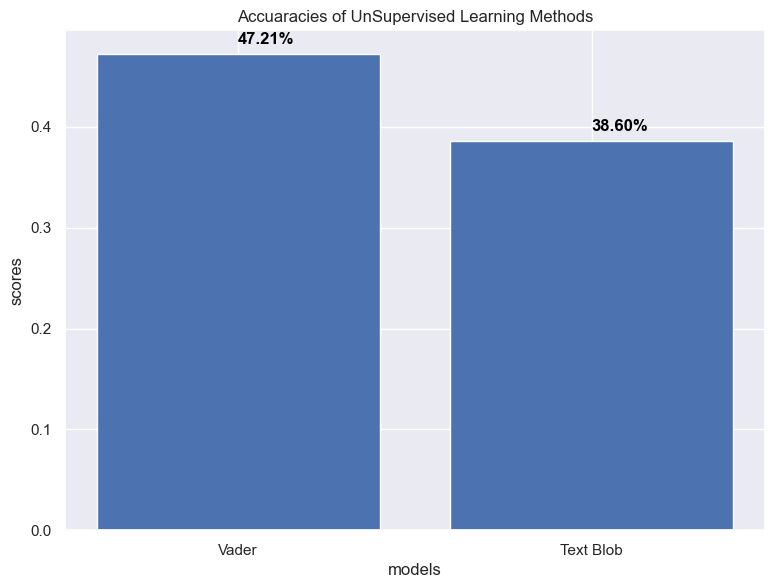

In [128]:
#plot the accuaracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(data["airline_sentiment"].tolist(),data["VADER_pred"].tolist()),accuracy_score(data["airline_sentiment"].tolist(),data["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #tittle of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

- Vader was more accurate, however we would still probably want to rely upon the other models. 

# Conclusion and Insights 

* First - the tweets were obtained during a weather anomoly, therefore it should be evaluated based upon that occurance appropriately and the insight it may provide during a weather event.
* The Airlines of(['United', 'Southwest', 'Delta', 'US Airways','American'] are heavily operated out of the North East US, whereas Virgin America does not have the number or breadth of flights in this area( especially in 2015)

* If we took the neutral and positive statements and added them together our accuracy would be higher, but for our purposes on this project we kept them separate. It is approximated that we could potentially obtain around 91% accuracy

* Countvectorizer predicted positive sentiment slightly better whereas TD-IDF predicted negative sentiment slightly better. So depending on the prediction you are desiring you would select accordingly .

* Insight from EDA would suggest that during poor weather events airlines would want to ramp up their customer service to address the issues . They would also consider looking at their baggage operations to insure the belongings are matched with the consumers.

* additional insight on accuracy might be obtained by attempting some other algorithms and depending on the ability for the answer requested you might scale this to a positive versus negative sentiment. 

_ Thank you , Sincerely Frederick Duff